In [3]:
import numpy as np
import pandas as pd
import os
import pyarrow.parquet as pa
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind


# Tables

In [4]:
li_power = []
for file in os.listdir("PowerInfo"):
    li_power.append(pd.read_parquet(f"PowerInfo/{file}"))
PowerInfo = pd.concat(li_power, axis=0, ignore_index=True)


In [5]:
li_period = []
for file in os.listdir("PeriodInfo"):
    li_period.append(pd.read_parquet(f"PeriodInfo/{file}"))
PeriodInfo = pd.concat(li_period, axis=0, ignore_index=True)


In [6]:
li_gameInfo = []
for file in os.listdir("GameInfo"):
    li_gameInfo.append(pd.read_parquet(f"GameInfo/{file}"))
GameInfo = pd.concat(li_gameInfo, axis=0, ignore_index=True)

In [7]:
li_homeTeam = []
for file in os.listdir("MatchHomeTeamInfo"):
    li_homeTeam.append(pd.read_parquet(f"MatchHomeTeamInfo/{file}"))
MatchHomeTeamInfo = pd.concat(li_homeTeam, axis=0, ignore_index=True)

C:\Users\fz\AppData\Local\Temp\ipykernel_18564\1057753253.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MatchHomeTeamInfo = pd.concat(li_homeTeam, axis=0, ignore_index=True)


In [8]:
li_awayTeam=[]
for file in os.listdir("MatchAwayTeamInfo"):
    li_awayTeam.append(pd.read_parquet(f"MatchAwayTeamInfo/{file}"))
MatchAwayTeamInfo = pd.concat(li_awayTeam, axis=0, ignore_index=True)

C:\Users\fz\AppData\Local\Temp\ipykernel_18564\2603646164.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MatchAwayTeamInfo = pd.concat(li_awayTeam, axis=0, ignore_index=True)


In [9]:
li_MatchEventInfo = []
for file in os.listdir("MatchEventInfo"):
    li_MatchEventInfo.append(pd.read_parquet(f"MatchEventInfo/{file}"))
MatchEventInfo = pd.concat(li_MatchEventInfo, axis=0, ignore_index=True)


In [10]:
li_homeScore = []
for file in os.listdir("MatchHomeScoreInfo"):
    li_homeScore.append(pd.read_parquet(f"MatchHomeScoreInfo/{file}"))
MatchHomeScoreInfo = pd.concat(li_homeScore, axis=0, ignore_index=True)


In [11]:
li_awayScore=[]
for file in os.listdir("MatchAwayScoreInfo"):
    li_awayScore.append(pd.read_parquet(f"MatchAwayScoreInfo/{file}"))
MatchAwayScoreInfo = pd.concat(li_awayScore, axis=0, ignore_index=True)

In [12]:
li_round = []
for file in os.listdir("MatchRoundInfo"):
    li_round.append(pd.read_parquet(f"MatchRoundInfo/{file}"))
MatchRoundInfo = pd.concat(li_round, axis=0, ignore_index=True)

In [13]:
li_season = []
for file in os.listdir("MatchSeasonInfo"):
    li_season.append(pd.read_parquet(f"MatchSeasonInfo/{file}"))
MatchSeasonInfo = pd.concat(li_season, axis=0, ignore_index=True)

In [14]:
li_time = []
for file in os.listdir("MatchTimeInfo"):
    li_time.append(pd.read_parquet(f"MatchTimeInfo/{file}"))
MatchTimeInfo = pd.concat(li_time, axis=0, ignore_index=True)

In [15]:
li_tournament = []
for file in os.listdir("MatchTournamentInfo"):
    li_tournament.append(pd.read_parquet(f"MatchTournamentInfo/{file}"))
MatchTournamentInfo = pd.concat(li_tournament, axis=0, ignore_index=True)

In [16]:
li_venue = []
for file in os.listdir("MatchVenueInfo"):
    li_venue.append(pd.read_parquet(f"MatchVenueInfo/{file}"))
MatchVenueInfo = pd.concat(li_venue, axis=0, ignore_index=True)


In [17]:
li_votes = []
for file in os.listdir("MatchVotesInfo"):
    li_votes.append(pd.read_parquet(f"MatchVotesInfo/{file}"))
MatchVotesInfo = pd.concat(li_votes, axis=0, ignore_index=True)

In [18]:
li_odds = []
for file in os.listdir("OddsInfo"):
    li_odds.append(pd.read_parquet(f"OddsInfo/{file}"))
OddsInfo = pd.concat(li_odds, axis=0, ignore_index=True)

# `Extra Questions`

# `E_Q1`
MohammadReza 1

# Does the number of Aces have a particular effect on the number of Double faults?

In [18]:
#double fault and ace per player per match

selected=MatchEventInfo[['match_id','winner_code']]
total_ace=PeriodInfo[(PeriodInfo['period']=='ALL') & (PeriodInfo['statistic_name']=='aces')]
total_double=PeriodInfo[(PeriodInfo['period']=='ALL') & (PeriodInfo['statistic_name']=='double_faults')]
total_ace=total_ace[['match_id','home_value','away_value']]
total_double=total_double[['match_id','home_value','away_value']]
selected=selected.merge(total_ace,on='match_id',how='left')
selected=selected.merge(total_double,on='match_id',how='left',suffixes=['_ace','_doubl_fault'])

selected=selected.merge(MatchHomeTeamInfo[['match_id','name','gender','player_id','current_rank']], on='match_id', how='left')
selected=selected.merge(MatchAwayTeamInfo[['match_id','name','gender','player_id','current_rank']], on='match_id', how='left', suffixes=['_home','_away'])
#dropping null values
selected=selected.dropna(subset='home_value_ace')
selected_home1=selected[['match_id','home_value_ace','home_value_doubl_fault','name_home','gender_home','player_id_home','current_rank_home','gender_away']]
selected_home1=selected_home1.fillna({'gender_home':''})
selected_home1=selected_home1.fillna({'gender_away':''})
selected_home1['gender']=selected_home1['gender_home']+selected_home1['gender_away']
selected_home1=selected_home1.drop(columns=['gender_home','gender_away'])
selected_home1=selected_home1.rename(columns={'home_value_ace':'value_ace','home_value_doubl_fault':'value_doubl_fault','name_home':'name','player_id_home':'player_id','current_rank_home':'current_rank'})

selected_away1=selected[['match_id','away_value_ace','away_value_doubl_fault','name_away','gender_home','player_id_away','current_rank_away','gender_away']]
selected_away1=selected_away1.fillna({'gender_home':''})
selected_away1=selected_away1.fillna({'gender_away':''})
selected_away1['gender']=selected_away1['gender_home']+selected_away1['gender_away']
selected_away1=selected_away1.drop(columns=['gender_home','gender_away'])
selected_away1=selected_away1.rename(columns={'away_value_ace':'value_ace','away_value_doubl_fault':'value_doubl_fault','name_away':'name','player_id_away':'player_id','current_rank_away':'current_rank'})

select_total=pd.concat([selected_home1,selected_away1], axis=0)
select_total

,match_id,value_ace,value_doubl_fault,name,player_id,current_rank,gender
10,11674074,1.0,1.0,Kudermetova V.,66968.0,19,FF
11,11674103,5.0,1.0,Ofner S.,83397.0,43,MM
12,11674105,18.0,1.0,Korda S.,195840.0,24,MM
13,11674110,4.0,3.0,Lehečka J.,254742.0,31,MM
14,11674111,4.0,3.0,Ofner S.,83397.0,43,MM
...,...,...,...,...,...,...,...
759,11703444,1.0,4.0,NaN,NaN,NaN,
760,11703445,2.0,0.0,Nad P.,349490.0,1473,MM
761,11703470,2.0,0.0,Lizarazo Y.,42864.0,837,FF
762,11703524,0.0,4.0,NaN,NaN,NaN,M


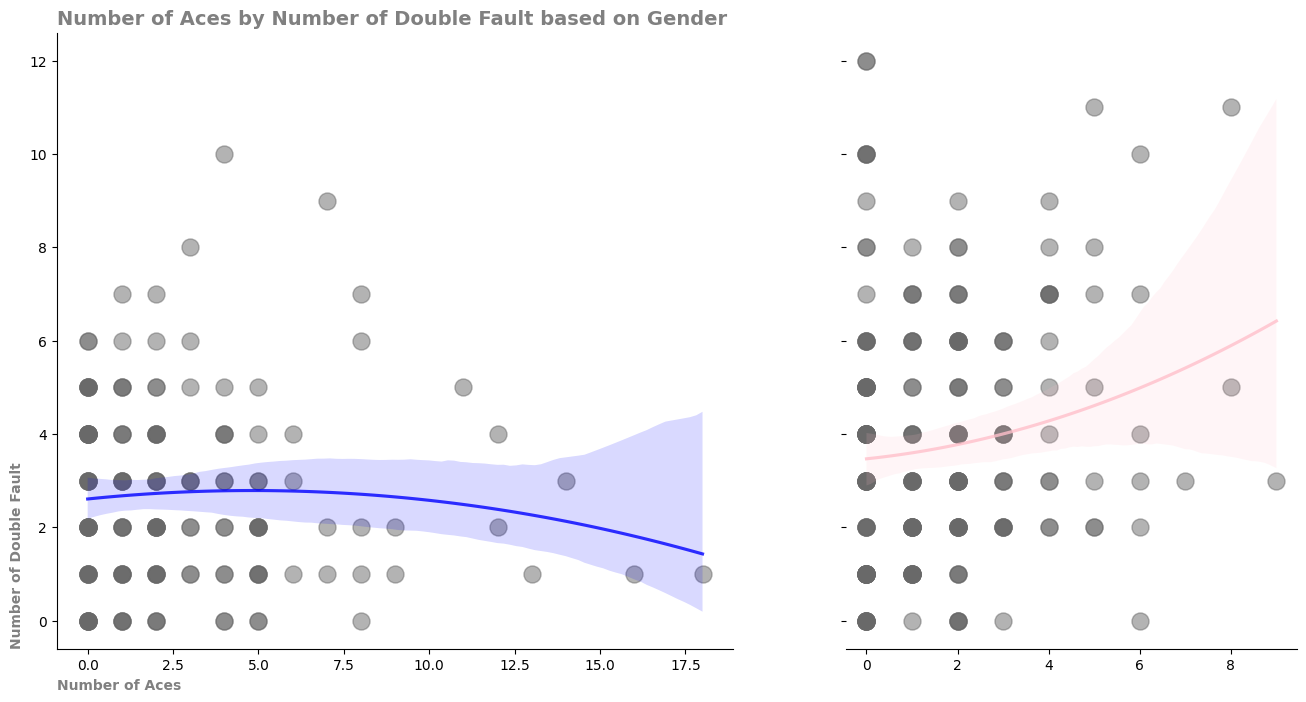

In [19]:
male=select_total[(select_total['gender']=='M') | (select_total['gender']=='MM')]
female=select_total[(select_total['gender']=='F') | (select_total['gender']=='FF')]
figure,(ax_male,ax_female)=plt.subplots(1,2,figsize=(16, 8),sharey=True, width_ratios=[3,2])
ax_male = sns.regplot(
    x="value_ace",
    y="value_doubl_fault",
    data=male,
    scatter_kws={"s": 150, "color": "dimgray", "alpha": 0.5},
    line_kws={"color": "blue", "alpha": 0.8}, ax=ax_male,
    order=2
)
ax_female = sns.regplot(
    x="value_ace",
    y="value_doubl_fault",
    data=female,
    scatter_kws={"s": 150, "color": "dimgray", "alpha": 0.5},
    line_kws={"color": "pink", "alpha": 0.8},ax=ax_female,
    order=2
)
ax_male.set_title(
    "Number of Aces by Number of Double Fault based on Gender",
    weight="bold",
    color="gray",
    fontsize=14,
    loc="left",
)

ax_male.set_ylabel(
    "Number of Double Fault",
    loc="bottom",
    weight="bold",
    fontsize=10,
    color="gray",
)
ax_female.set_ylabel(
    "",
    loc="bottom",
    weight="bold",
    fontsize=10,
    color="gray",
)
ax_male.set_xlabel(
    "Number of Aces", loc="left", weight="bold", fontsize=10, color="gray"
)
ax_female.set_xlabel(
    "", loc="left", weight="bold", fontsize=10, color="gray"
)
ax_male.spines[["right", "top"]].set_visible(False)
ax_female.spines[["right", "top",'left']].set_visible(False)


# `E_Q2` 
MohammadReza 2

# How likely it is that a successful first serve leads to a point?
# Is there any connection between this possibility and players' rank or number of wins ?

In [22]:

sel=MatchEventInfo[['match_id','winner_code']]
total_1st=PeriodInfo[(PeriodInfo['period']=='ALL') & (PeriodInfo['statistic_name']=='first_serve')]
total_1st['1st_serve%_home']=total_1st['home_value']/total_1st['home_total']
total_1st['1st_serve%_away']=total_1st['away_value']/total_1st['away_total']
total_1st=total_1st[['1st_serve%_home','1st_serve%_away','match_id']]

total_1st_point=PeriodInfo[(PeriodInfo['period']=='ALL') & (PeriodInfo['statistic_name']=='first_serve_points')]
total_1st_point['1st_point%_home']=total_1st_point['home_value']/total_1st_point['home_total']
total_1st_point['1st_point%_away']=total_1st_point['away_value']/total_1st_point['away_total']
total_1st_point=total_1st_point[['match_id','1st_point%_home','1st_point%_away']]

total_1st_success=total_1st.merge(total_1st_point,on='match_id',how='inner')
total_1st_success['points%_per_1st_home']=total_1st_success['1st_serve%_home']*total_1st_success['1st_point%_home']
total_1st_success['points%_per_1st_away']=total_1st_success['1st_serve%_away']*total_1st_success['1st_point%_away']
total_1st_success=total_1st_success[['match_id','points%_per_1st_home','points%_per_1st_away']]
# total_1st_success

total_2nd=PeriodInfo[(PeriodInfo['period']=='ALL') & (PeriodInfo['statistic_name']=='second_serve')]
total_2nd['2nd_serve%_home']=total_2nd['home_value']/total_2nd['home_total']
total_2nd['2nd_serve%_away']=total_2nd['away_value']/total_2nd['away_total']
total_2nd=total_2nd[['2nd_serve%_home','2nd_serve%_away','match_id']]

total_2nd_point=PeriodInfo[(PeriodInfo['period']=='ALL') & (PeriodInfo['statistic_name']=='second_serve_points')]
total_2nd_point['2nd_point%_home']=total_2nd_point['home_value']/total_2nd_point['home_total']
total_2nd_point['2nd_point%_away']=total_2nd_point['away_value']/total_2nd_point['away_total']
total_2nd_point=total_2nd_point[['2nd_point%_home','2nd_point%_away','match_id']]

total_2nd_success=total_2nd.merge(total_2nd_point,on='match_id',how='inner')
total_2nd_success['points%_per_2nd_home']=total_2nd_success['2nd_serve%_home']*total_2nd_success['2nd_point%_home']
total_2nd_success['points%_per_2nd_away']=total_2nd_success['2nd_serve%_away']*total_2nd_success['2nd_point%_away']
total_2nd_success=total_2nd_success[['match_id','points%_per_2nd_home','points%_per_2nd_away']]

final_serve_success=total_1st_success.merge(total_2nd_success, on='match_id', how='inner')
final_serve_success=final_serve_success.merge(sel, on='match_id', how='left')

home_serve_success=final_serve_success[['match_id','points%_per_1st_home','points%_per_2nd_home','winner_code']].rename(columns={'points%_per_1st_home':'points%_per_1st','points%_per_2nd_home':'points%_per_2nd'})
home_serve_success['win_status']=np.where(home_serve_success['winner_code']==1,1,0)
home_serve_success=home_serve_success.drop(columns='winner_code')
away_serve_success=final_serve_success[['match_id','points%_per_1st_away','points%_per_2nd_away','winner_code']].rename(columns={'points%_per_1st_away':'points%_per_1st','points%_per_2nd_away':'points%_per_2nd'})
away_serve_success['win_status']=np.where(away_serve_success['winner_code']==2,1,0)
away_serve_success=away_serve_success.drop(columns='winner_code')

home_serve_success=home_serve_success.merge(MatchHomeTeamInfo[['match_id','name','gender','player_id','current_rank']],on='match_id', how='left')
away_serve_success=away_serve_success.merge(MatchAwayTeamInfo[['match_id','name','gender','player_id','current_rank']], on='match_id', how='left')

final_success_df=pd.concat([home_serve_success,away_serve_success], axis=0,ignore_index=True)

# PeriodInfo.head(20)
final_success_df


C:\Users\fz\AppData\Local\Temp\ipykernel_18564\718769463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_1st['1st_serve%_home']=total_1st['home_value']/total_1st['home_total']
C:\Users\fz\AppData\Local\Temp\ipykernel_18564\718769463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_1st['1st_serve%_away']=total_1st['away_value']/total_1st['away_total']
C:\Users\fz\AppData\Local\Temp\ipykernel_18564\718769463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,match_id,points%_per_1st,points%_per_2nd,win_status,name,gender,player_id,current_rank
0,11674074,0.480769,0.734568,1,Kudermetova V.,F,66968.0,19
1,11674103,0.421053,0.628698,1,Ofner S.,M,83397.0,43
2,11674105,0.570175,0.599606,1,Korda S.,M,195840.0,24
3,11674110,0.560000,0.330579,0,Lehečka J.,M,254742.0,31
4,11674111,0.346939,0.316800,0,Ofner S.,M,83397.0,43
...,...,...,...,...,...,...,...,...
413,11703444,0.500000,0.129630,0,NaN,NaN,NaN,NaN
414,11703445,0.360000,0.606061,0,Nad P.,M,349490.0,1473
415,11703470,0.339623,0.500000,0,Lizarazo Y.,F,42864.0,837
416,11703524,0.320755,0.280000,0,NaN,NaN,NaN,NaN


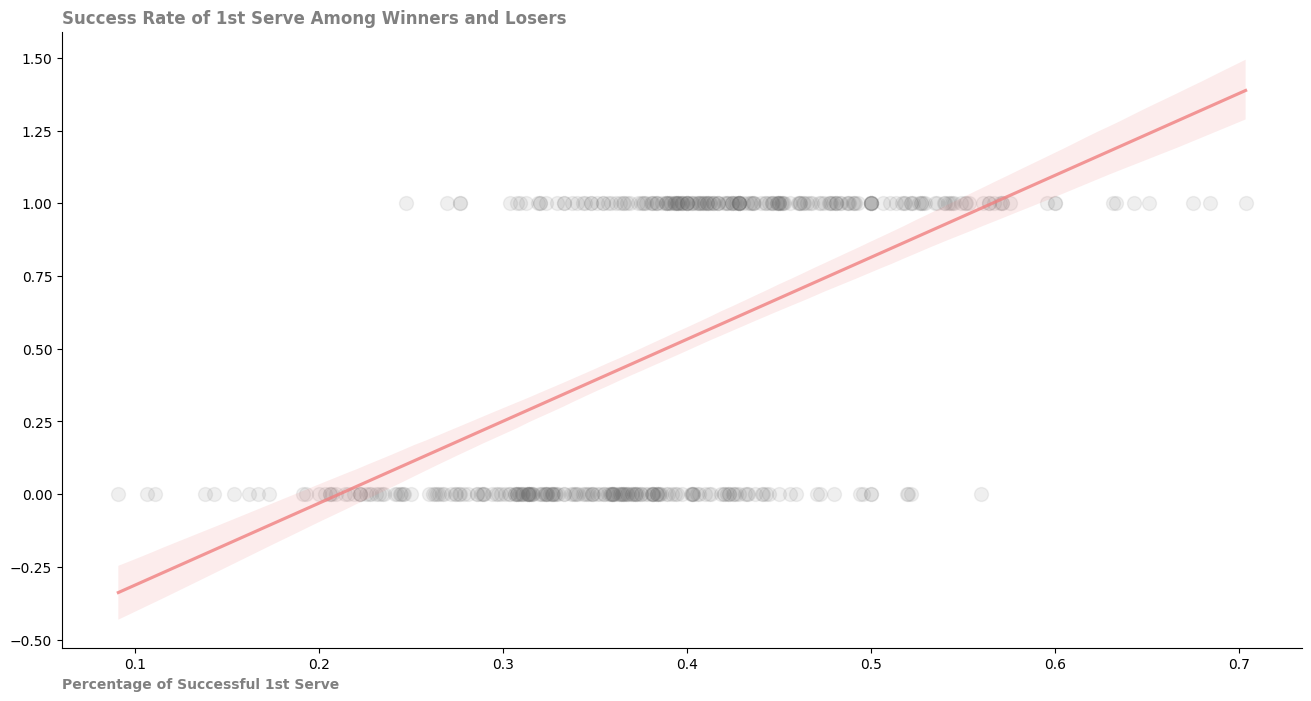

In [19]:
# check if there is adifferance between avarage of 1st success among winners and losers
#& (final_success_df['gender']=='M')
final_success_df.groupby('win_status')['points%_per_1st'].mean()
cat_winner = final_success_df[(final_success_df['win_status']==1)]
cat_loser = final_success_df[final_success_df['win_status']==0]
ttest_ind(cat_winner['points%_per_1st'], cat_loser['points%_per_1st'])

plt.figure(figsize=(16, 8))
ax = sns.regplot(
    y="win_status",
    x="points%_per_1st",
    data=final_success_df,
    scatter_kws={"s": 100, "color": "dimgray", "alpha": 0.1},
    line_kws={"color": "lightcoral", "alpha": 0.8},
    fit_reg=True,
    
)
ax.set_title(
    "Success Rate of 1st Serve Among Winners and Losers",
    weight="bold",
    color="gray",
    fontsize=12,
    loc="left",
)
ax.set_xlabel(
    "Percentage of Successful 1st Serve", loc="left", weight="bold", fontsize=10, color="gray"
)

ax.set_ylabel(
    "",
    loc="bottom",
    weight="bold",
    fontsize=10,
    color="gray",
)

ax.spines[["right", "top"]].set_visible(False)


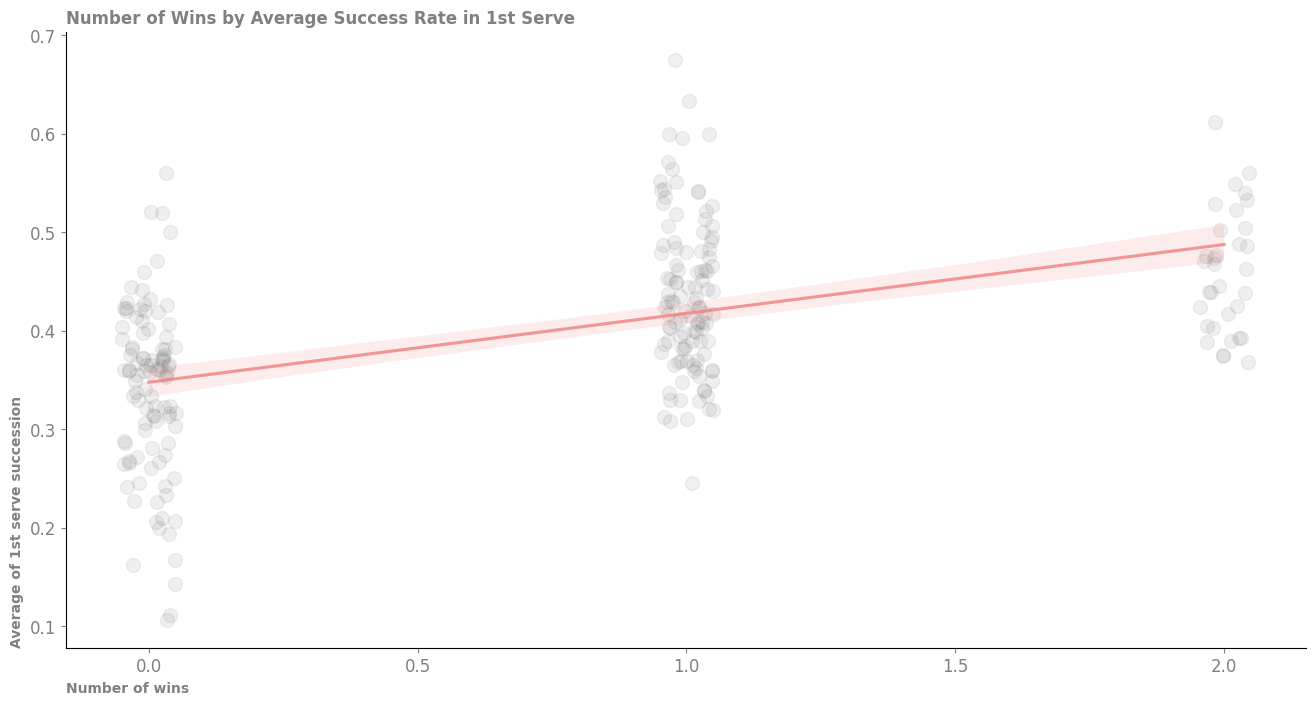

In [20]:
x=final_success_df.dropna(subset='name')
x=x.groupby('name', as_index=False).agg(no_win=('win_status','sum'),first_mean=('points%_per_1st','mean')).sort_values('no_win', ascending=False)


plt.figure(figsize=(16, 8))
ax = sns.regplot(
    x="no_win",
    y="first_mean",
    data=x,
    scatter_kws={"s": 100, "color": "dimgray", "alpha": 0.1},
    line_kws={"color": "lightcoral", "alpha": 0.8},
    fit_reg=True,
    x_jitter=.05
)
ax.set_title(
    "Number of Wins by Average Success Rate in 1st Serve",
    weight="bold",
    color="gray",
    fontsize=12,
    loc="left",
)
ax.set_xlabel(
    "Number of wins", loc="left", weight="bold", fontsize=10, color="gray"
)

ax.set_ylabel(
    "Average of 1st serve succession",
    loc="bottom",
    weight="bold",
    fontsize=10,
    color="gray",
)

ax.spines[["right", "top"]].set_visible(False)

ax.tick_params(axis="x", colors="gray", labelsize="large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

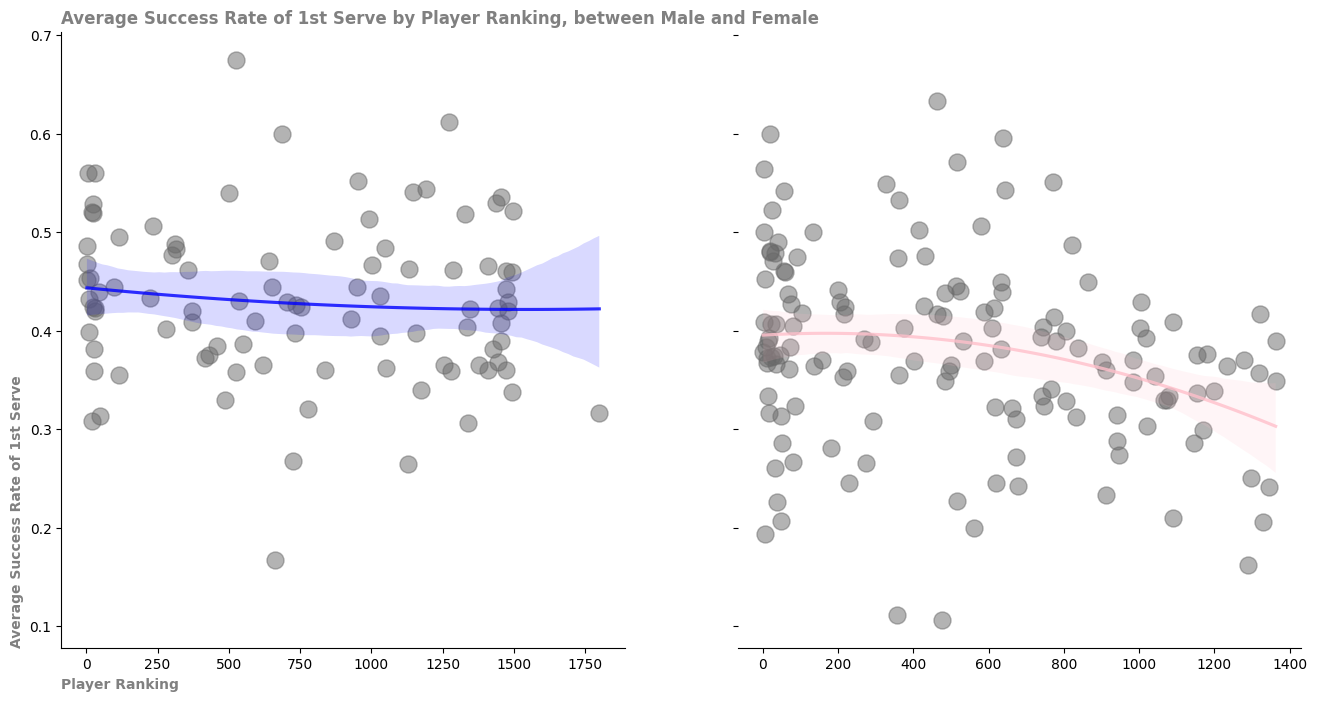

In [22]:
x=final_success_df.dropna(subset='name')
x=x.groupby(by=['name','player_id'], as_index=False).agg(no_win=('win_status','sum'),first_mean=('points%_per_1st','mean')).sort_values('no_win', ascending=False)
x=x.merge(final_success_df[['current_rank','player_id','gender']], on='player_id',how='left')
x=x.drop_duplicates().reset_index().drop(columns='index')
x=x.dropna(subset='current_rank')

male1=x[x['gender']=='M']
female1=x[x['gender']=='F']
female1=female1.astype({'current_rank': 'int32'})
male1=male1.astype({'current_rank': 'int32'})

figure,(ax_male,ax_female)=plt.subplots(1,2,figsize=(16, 8),sharey=True, width_ratios=[2,2])
ax_male = sns.regplot(
    x="current_rank",
    y="first_mean",
    data=male1,
    scatter_kws={"s": 150, "color": "dimgray", "alpha": 0.5},
    line_kws={"color": "blue", "alpha": 0.8}, ax=ax_male,
    fit_reg=True,
    order=2

)
ax_female = sns.regplot(
    x="current_rank",
    y="first_mean",
    data=female1,
    scatter_kws={"s": 150, "color": "dimgray", "alpha": 0.5},
    line_kws={"color": "pink", "alpha": 0.8},ax=ax_female,
    order=2

)
ax_male.set_title(
    "Average Success Rate of 1st Serve by Player Ranking, between Male and Female",
    weight="bold",
    color="gray",
    fontsize=12,
    loc="left",
)
ax_male.set_xlabel(
    "Player Ranking", loc="left", weight="bold", fontsize=10, color="gray"
)

ax_male.set_ylabel(
    "Average Success Rate of 1st Serve",
    loc="bottom",
    weight="bold",
    fontsize=10,
    color="gray",
)
ax_female.set_xlabel(
    "", loc="left", weight="bold", fontsize=10, color="gray"
)

ax_female.set_ylabel(
    "",
    loc="bottom",
    weight="bold",
    fontsize=10,
    color="gray",
)
ax_male.spines[["right", "top"]].set_visible(False)
ax_female.spines[["right", "top",'left']].set_visible(False)


# female1.info()
# male1.info()

Text(0, 0, '')

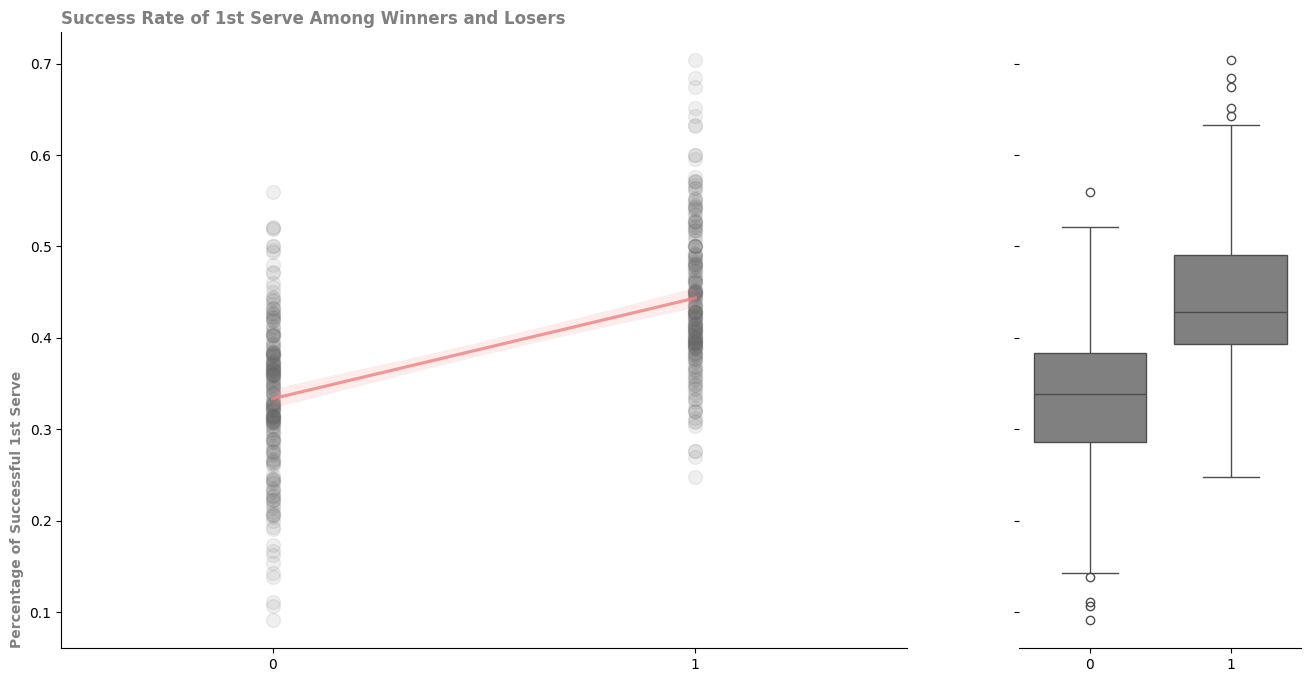

In [23]:
figure, (ax_reg,ax_box)=plt.subplots(1,2,figsize=(16, 8), sharey=True, sharex=True,width_ratios=[3,1])
ax_reg = sns.regplot(
    x="win_status",
    y="points%_per_1st",
    data=final_success_df,
    scatter_kws={"s": 100, "color": "dimgray", "alpha": 0.1},
    line_kws={"color": "lightcoral", "alpha": 0.8},
    fit_reg=True,
    ax=ax_reg
)
ax_reg.set_title(
    "Success Rate of 1st Serve Among Winners and Losers",
    weight="bold",
    color="gray",
    fontsize=12,
    loc="left",
)
ax_reg.set_xlabel(
    "", loc="left", weight="bold", fontsize=10, color="gray"
)

ax_reg.set_ylabel(
    "Percentage of Successful 1st Serve",
    loc="bottom",
    weight="bold",
    fontsize=10,
    color="gray",
)

ax_reg.spines[["right", "top"]].set_visible(False)

ax_box= sns.boxplot(y="points%_per_1st",x="win_status", data=final_success_df, color="gray", ax=ax_box)
ax_box.spines[["right", "top",'left']].set_visible(False)
ax_box.set_xlabel(
    "", loc="left", weight="bold", fontsize=10, color="gray"
)


# `E_Q3`
sareh 1

#  Which tournaments have had winners at home and corresponded to the home vote

Selecting all the final matches

In [23]:
final_matches = MatchRoundInfo[MatchRoundInfo['name'] == 'Final']

Merging DataFrames and select necessary columns

In [24]:
merged_df= pd.merge(final_matches,MatchVotesInfo,on = "match_id",how="inner")
merged_df_finally= pd.merge(merged_df,MatchEventInfo,on = "match_id",how="inner")
selecte_columns= ['match_id','name', 'home_vote','away_vote','winner_code']
df_final= merged_df_finally[selecte_columns]
df_final.head(10)

,match_id,name,home_vote,away_vote,winner_code
0,11673962,Final,909,213,1
1,11673993,Final,744,208,2
2,11674011,Final,505,559,2
3,11674032,Final,354,1127,1
4,11674074,Final,778,1968,1
5,11698055,Final,103,79,2
6,11698379,Final,50,113,2
7,11698403,Final,100,55,1
8,11698476,Final,63,115,2
9,11698477,Final,66,28,2


Seprating winners at home and comparison of votes

In [25]:
df_final = df_final.loc[df_final['home_vote'] > df_final['away_vote']]
home_vote_true = df_final[df_final['winner_code'] == 1]
home_vote_true.head()

,match_id,name,home_vote,away_vote,winner_code
0,11673962,Final,909,213,1
7,11698403,Final,100,55,1
12,11698683,Final,79,32,1
17,11699097,Final,80,41,1
21,11699386,Final,211,81,1


#   `E_Q4`
Sareh 2

# Top 5 Countries with the Highest Number of Matches

Calculate the number of matches per country

In [26]:
matches_per_country = MatchVenueInfo['country'].value_counts()

Find the top 5 countries with the highest number of matches

In [27]:
top_5_countries = matches_per_country.head(5)
inverted_s = top_5_countries.sort_values(ascending=True)
print(inverted_s)

country
Spain        64
Egypt        68
Argentina    75
France       79
Tunisia      79
Name: count, dtype: int64


Plotting the bar chart 'Top 5 Countries with the Highest Number of Matches

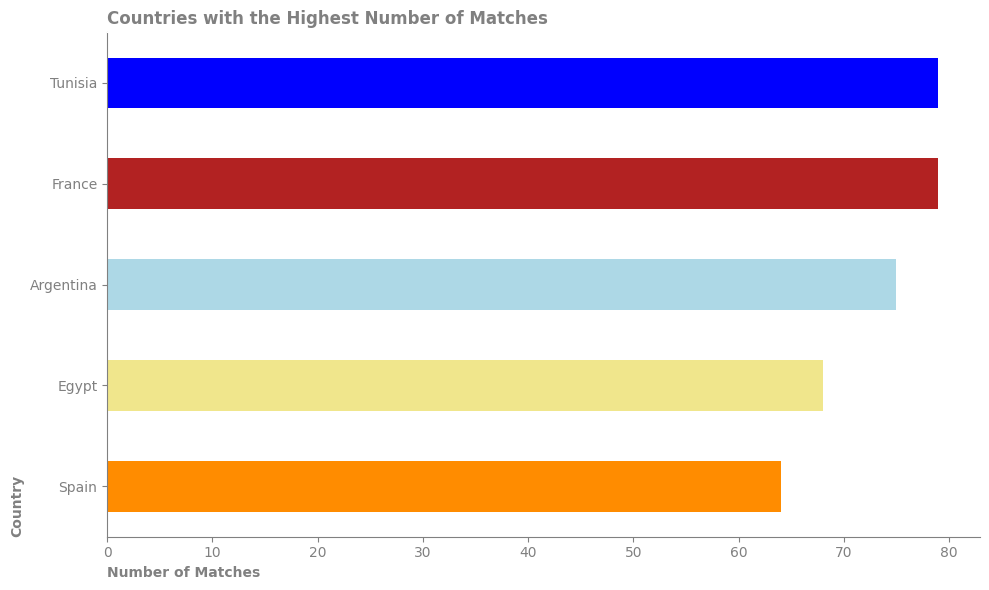

In [28]:
plt.figure(figsize=(10, 6))
colors = ["blue","firebrick","lightblue","khaki","darkorange"]
colors = ["darkorange","khaki","lightblue","firebrick","blue"]
inverted_s.plot(kind='barh', color=colors)
#plt.bar(top_5_countries.index ,top_5_countries.values)
plt.title('Countries with the Highest Number of Matches',fontweight='bold',loc='left',color='grey')
plt.xlabel('Number of Matches',fontsize=10,fontweight='bold',loc='left',color='grey')
plt.ylabel('Country',fontsize=10,fontweight='bold',loc='bottom',color='grey')
plt.xticks(rotation=360)
plt.tight_layout()
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('white')
plt.tick_params(axis='x',colors='grey')
plt.tick_params(axis='y',colors='grey')
plt.show()

# `E_Q5`
Sareh 3

# Most common surface per country  for Top 5 Countries with the Highest Number of Matches

Merge the two tables on match_id

In [29]:
merged_df = pd.merge(MatchVenueInfo, MatchTournamentInfo, on='match_id')

Group by country and calculate the most common surface

In [30]:
most_common_surface_per_country = merged_df.groupby('country')['ground_type'].agg(lambda x: x.mode()[0])
print(most_common_surface_per_country)


country
Argentina              Red clay
Australia     Hardcourt outdoor
Austria                Red clay
Brazil                 Red clay
Bulgaria               Red clay
China         Hardcourt outdoor
Colombia               Red clay
Croatia                Red clay
Egypt         Hardcourt outdoor
France         Hardcourt indoor
Italy                  Red clay
Japan         Hardcourt outdoor
Kazakhstan     Hardcourt indoor
Portugal               Red clay
Qatar         Hardcourt outdoor
Serbia                 Red clay
Spain         Hardcourt outdoor
Tunisia       Hardcourt outdoor
USA           Hardcourt outdoor
Name: ground_type, dtype: object


Perform inner join

In [31]:
merged_df_join = pd.merge(top_5_countries,most_common_surface_per_country,on = "country",how="inner")
print(merged_df_join)
ground_types = merged_df_join['ground_type']

           count        ground_type
country                            
France        79   Hardcourt indoor
Tunisia       79  Hardcourt outdoor
Argentina     75           Red clay
Egypt         68  Hardcourt outdoor
Spain         64  Hardcourt outdoor


Plotting Most Common Surface in Top 5 Countries with the Highest Number of Matches

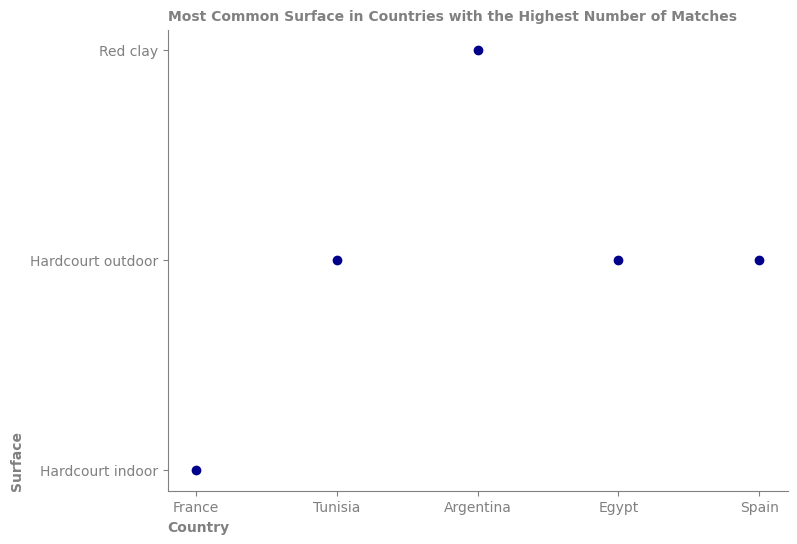

In [32]:
countries = ['France','Tunisia','Argentina','Egypt','Spain']

plt.figure(figsize=(8, 6))
plt.scatter(countries,ground_types,color="darkblue",)
plt.title('Most Common Surface in Countries with the Highest Number of Matches',fontsize=10,fontweight='bold',loc='left',color='grey')
plt.ylabel('Surface',fontsize=10,fontweight='bold',loc='bottom',color='grey')
plt.xlabel('Country',fontsize=10,fontweight='bold',loc='left',color='grey')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('white')
plt.tick_params(axis='x',colors='grey')
plt.tick_params(axis='y',colors='grey')
plt.show()

# `E_Q6`
MohammadSadegh 1

# Which rounds have the longest Games?  Is there a relation between game's time and players rank?

In [35]:
away = MatchAwayTeamInfo
home = MatchHomeTeamInfo
players = pd.concat([home, away], ignore_index=True)

MatchRoundInfo

,match_id,round_id,name,slug,cup_round_type
0,11673958,28,Semifinal,semifinal,2
1,11673962,29,Final,final,1
2,11673963,28,Semifinal,semifinal,2
3,11673993,29,Final,final,1
4,11674000,28,Semifinal,semifinal,2
...,...,...,...,...,...
172,11701612,6,Round of 32,round-of-32,16
173,11701614,6,Round of 32,round-of-32,16
174,11701615,6,Round of 32,round-of-32,16
175,11701616,6,Round of 32,round-of-32,16


In [25]:
df = MatchTimeInfo.loc[:, "match_id":"period_3"]
df.fillna(0, inplace=True)
df.loc[:, "gameDuration"] = df["period_1"] + df["period_2"] + df["period_3"]
# df = df[df["gameDuration"] > 0]
times = df[["match_id", "gameDuration"]]

C:\Users\fz\AppData\Local\Temp\ipykernel_13000\2359079891.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)


In [26]:
rounds = pd.merge(MatchRoundInfo, times, on=["match_id"])[["match_id", "name", "gameDuration"]]
durations = rounds.groupby(["name"])["gameDuration"].median()

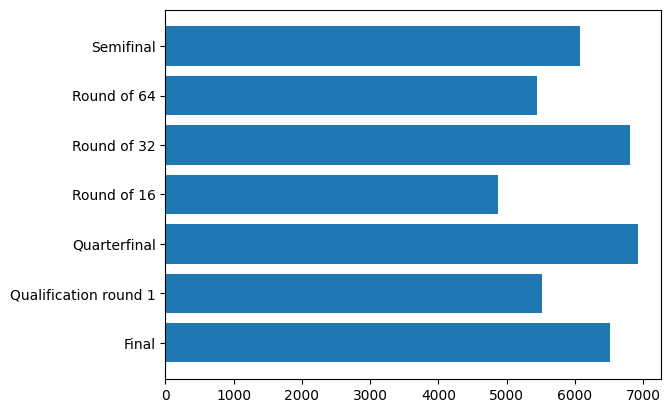

In [31]:
plt.barh(durations.keys(), durations.values);

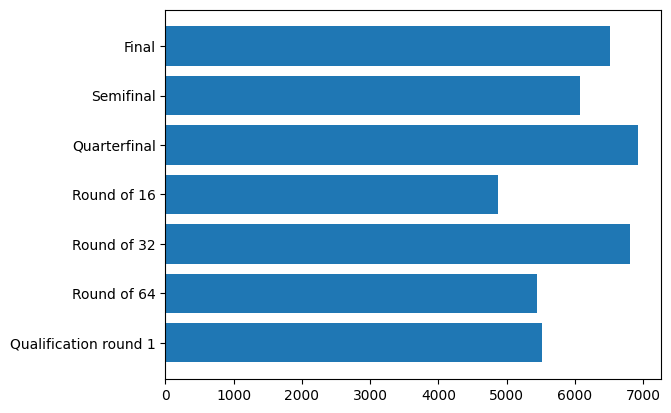

In [32]:
x = ['Qualification round 1', 'Round of 64', 'Round of 32', 'Round of 16', 'Quarterfinal', 'Semifinal', 'Final']
y = [5510.5, 5447., 6812., 4868., 6921.5, 6078., 6512.]
plt.barh(x, y);

<BarContainer object of 7 artists>

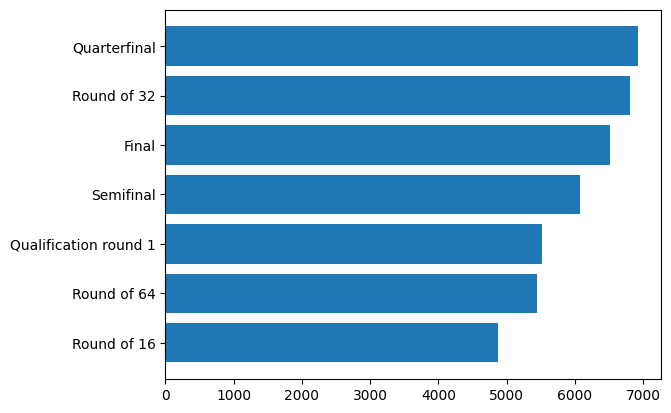

In [33]:
d = durations.sort_values()
plt.barh(d.keys(), d.values)

In [36]:
rang = (players["current_rank"].min(), players["current_rank"].max())

count of players: 165


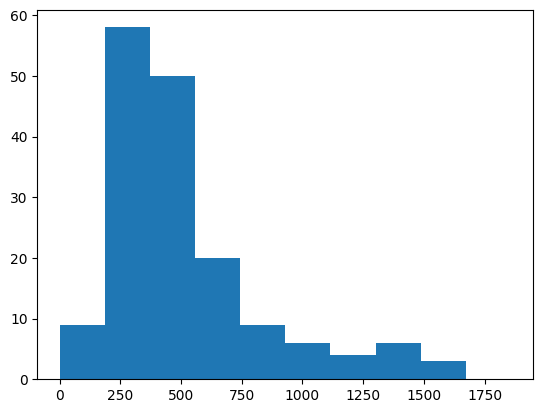

In [37]:
matchIds = MatchRoundInfo[MatchRoundInfo["name"] == "Qualification round 1"]["match_id"]
Ranks = players[players["match_id"].isin(matchIds)]["current_rank"]
print(f"count of players: {Ranks.count()}")
plt.hist(Ranks, range=rang);

count of players: 44


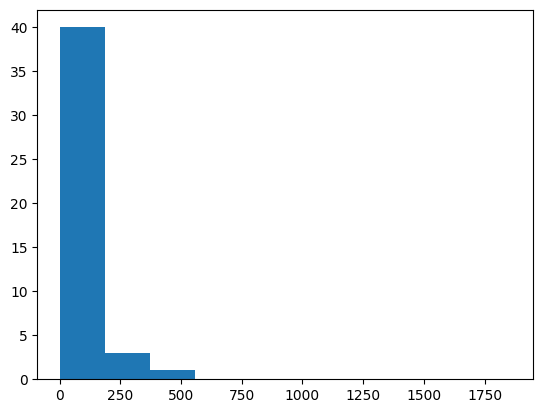

In [38]:
matchIds = MatchRoundInfo[MatchRoundInfo["name"] == "Round of 64"]["match_id"]
Ranks = players[players["match_id"].isin(matchIds)]["current_rank"]
print(f"count of players: {Ranks.count()}")
plt.hist(Ranks,range=rang);

count of players: 24


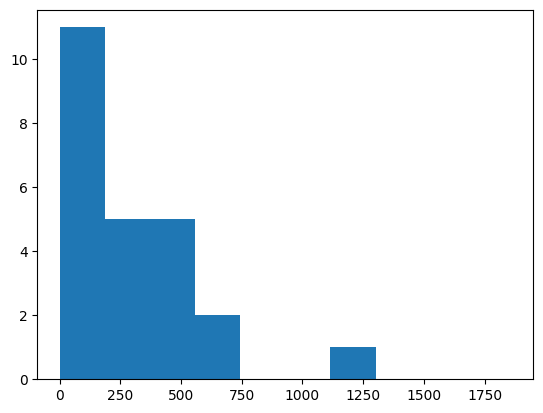

In [39]:
matchIds = MatchRoundInfo[MatchRoundInfo["name"] == "Round of 32"]["match_id"]
Ranks = players[players["match_id"].isin(matchIds)]["current_rank"]
print(f"count of players: {Ranks.count()}")
plt.hist(Ranks, range=rang);

here in Round of 16 we have the shortest games.<br/>
here we have the least players but not all of them are in top 200 ranks.<br/>
a person between 500 and 750 rank and a person about 1250 rank.<br/>
maybe its becuuse of them that the average came down.<br/>


count of players: 14


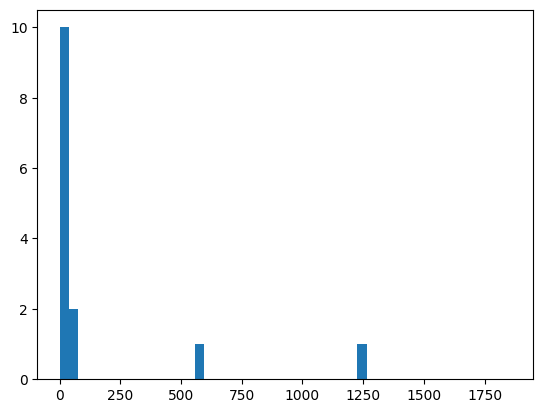

In [40]:
matchIds = MatchRoundInfo[MatchRoundInfo["name"] == "Round of 16"]["match_id"]
Ranks = players[players["match_id"].isin(matchIds)]["current_rank"]
print(f"count of players: {Ranks.count()}")
plt.hist(Ranks, range=rang, bins=50);

here is the longest games<br/>
as we can see here in Quarterfinal we have almost least players but them are between top 200 ranks.<br/>
and now It seems reasonable that here we have longer games.

count of players: 16


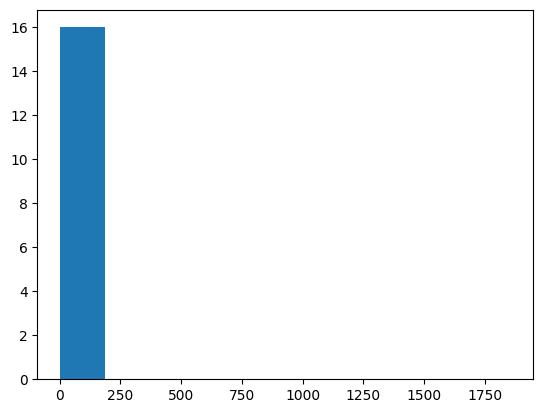

In [41]:
matchIds = MatchRoundInfo[MatchRoundInfo["name"] == "Quarterfinal"]["match_id"]
Ranks = players[players["match_id"].isin(matchIds)]["current_rank"]
print(f"count of players: {Ranks.count()}")
plt.hist(Ranks, range=rang);

count of players: 40


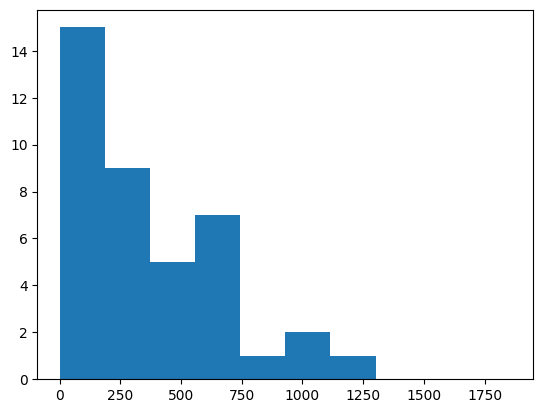

In [42]:
matchIds = MatchRoundInfo[MatchRoundInfo["name"] == "Semifinal"]["match_id"]
Ranks = players[players["match_id"].isin(matchIds)]["current_rank"]
print(f"count of players: {Ranks.count()}")
plt.hist(Ranks, range=rang);

count of players: 44


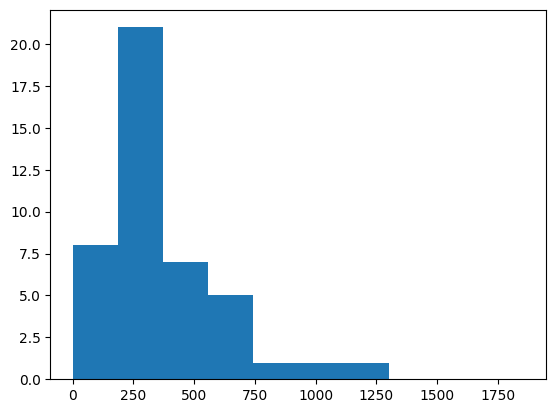

In [43]:
matchIds = MatchRoundInfo[MatchRoundInfo["name"] == "Final"]["match_id"]
Ranks = players[players["match_id"].isin(matchIds)]["current_rank"]
print(f"count of players: {Ranks.count()}")
plt.hist(Ranks, range=rang);

# `E_Q7`
MohammadSadegh 2

# Is there any game between two same person?

get player and their ids from away dataframe

In [24]:
away = MatchAwayTeamInfo[["match_id", "player_id"]]

get player and their ids from home dataframe

In [25]:
home = MatchHomeTeamInfo[["match_id", "player_id"]]

by look at these we can understan we have 272 common matches between away and home players

In [26]:
home[home["match_id"].isin(away["match_id"])].shape

(272, 2)

In [27]:
away[away["match_id"].isin(home["match_id"])].shape

(272, 2)

now let's find out is there any game between two same person?

by merging two dataframes we get common rows between them<br/>
it means any other games are not included in other data frame.

In [29]:
games = away.merge(home, on="match_id", suffixes=["_away", "_home"])
games

,match_id,player_id_away,player_id_home
0,11673958,221515,132834
1,11673962,302582,221515
2,11673963,57155,302582
3,11673993,51100,207081
4,11674000,213057,80491
...,...,...,...
267,11702218,260129,261752
268,11702248,108701,383821
269,11703443,416491,196958
270,11703445,349490,399574


this dataframe contains row which their `player_id_away` column value is also in `player_id_home` column

In [30]:
first = games[games["player_id_away"].isin(games["player_id_home"])]
first.shape

(39, 3)

this dataframe contains row which their `player_id_home` column value is also in `player_id_away` column 

In [31]:
second = games[games["player_id_home"].isin(games["player_id_away"])]
second.shape

(40, 3)

In [32]:
tmp = pd.concat([first, second], ignore_index=True)
tmp.drop_duplicates(ignore_index=True, inplace=True)
tmp.loc[:, "player_id_away":].duplicated().sum()

0

dataframe doesn't have any matches which two people play in same team in two diffrant matches.<br/>
but what if two people play in two matches but in diffrent teams? 

In [33]:
player_id_away = tmp["player_id_away"]
player_id_home = tmp["player_id_home"]

# (player_id_away, player_id_home)


In [34]:
org = tmp[["player_id_away", "player_id_home"]].values.tolist()
rev = tmp[["player_id_home", "player_id_away"]].values.tolist()

for i in org:
    if i in rev:
        print(i)

unfortunatly there is no game with same players

# `E_Q8` 
Fatemeh 1

# Is the round in which players are playing , a decisive factor in the number of sets ?

In [33]:

AwayScore = MatchAwayScoreInfo.dropna(axis=1 , how="all")
AwayScore = MatchAwayScoreInfo.dropna(subset=[ "period_3"]).reset_index().drop("index", axis=1)# i didn't consider one-set games

HomeScore = MatchHomeScoreInfo.dropna(axis=1 , how="all")
HomeScore = MatchHomeScoreInfo.dropna(subset=[ "period_3"]).reset_index().drop("index", axis=1)# i didn't consider one-set games


In [34]:
all_scores= pd.merge(AwayScore, HomeScore, on="match_id")
all_scores["games_per_set1"] = all_scores["period_1_x"] +all_scores["period_1_y"]
all_scores["games_per_set2"] = all_scores["period_2_x"] +all_scores["period_2_y"]
all_scores["games_per_set3"] = all_scores["period_3_x"] +all_scores["period_3_y"]


all_scores = all_scores.drop(['current_score_x', 'display_score_x', 'period_1_x',
       'period_2_x', 'period_3_x', 'period_1_tie_break_x',
       'period_2_tie_break_x', 'period_3_tie_break_x', 'current_score_y',
       'display_score_y', 'period_1_y', 'period_2_y', 'period_3_y',
       'period_1_tie_break_y', 'period_2_tie_break_y', 'period_3_tie_break_y'], axis=1)


In [36]:
three_set=GameInfo.groupby(["match_id"], as_index=False )[["set_id"]].max()
three_set = three_set[three_set["set_id"]==3]

firstGroup =pd.merge(MatchRoundInfo, three_set , how="left")
secondGroup = pd.merge(MatchRoundInfo ,all_scores , how="left" )


`The Number  of Three-set Games in all rounds of tournaments.`


In [38]:
all_set_given = pd.merge(firstGroup , secondGroup)
all_set_given = all_set_given[(~all_set_given["set_id"].isnull()) |(~all_set_given["games_per_set3"].isnull())].reset_index().drop("index" , axis=1)
all_set_given.groupby(["name"], as_index=False)["set_id"].size().sort_values("size", ascending=True)

,name,size
3,Round of 16,2
4,Round of 32,4
6,Semifinal,4
2,Quarterfinal,5
5,Round of 64,7
0,Final,10
1,Qualification round 1,30


Number  of Three-set Games in all rounds of tournaments.

as you can see in cases which the game's result is a decisive factor in player's seed  (qualification round ) or  it determines the winner of the tournament (final) , the number of sets in each match increases.

and it is more likely to have three-set games when players are of the same rank.

# `E_Q9`
Fatemeh 2

# How is the Distribution of Ranks in each Tournament ?
# In which Tournament did most of High-rank players participate?

In [40]:
entire_team=pd.concat([MatchHomeTeamInfo,MatchAwayTeamInfo],axis=0, ignore_index=True)
entire_team=entire_team.dropna(subset='current_rank')
entire_team=entire_team.drop_duplicates(subset='player_id')
entire_team = entire_team.drop([ 'slug', 'user_count', 'residence',
       'birthplace', 'height', 'weight', 'plays', 'turned_pro',
       'name_code', 'full_name'] , axis=1)


In [41]:
TournamentInfo = MatchTournamentInfo.dropna(subset='tournament_category_name')
TournamentInfo = MatchTournamentInfo.drop([ 'tournament_name', 'tournament_slug',
       'tournament_unique_id',
       'tournament_category_slug', 'user_count',
       'tennis_points', 'has_event_player_statistics',
       'crowd_sourcing_enabled', 'has_performance_graph_feature',
       'display_inverse_home_away_teams', 'priority', 'competition_type'] , axis=1)

tournament_players = pd.merge(TournamentInfo , entire_team )


C:\Users\fz\AppData\Local\Temp\ipykernel_19596\2187363633.py:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


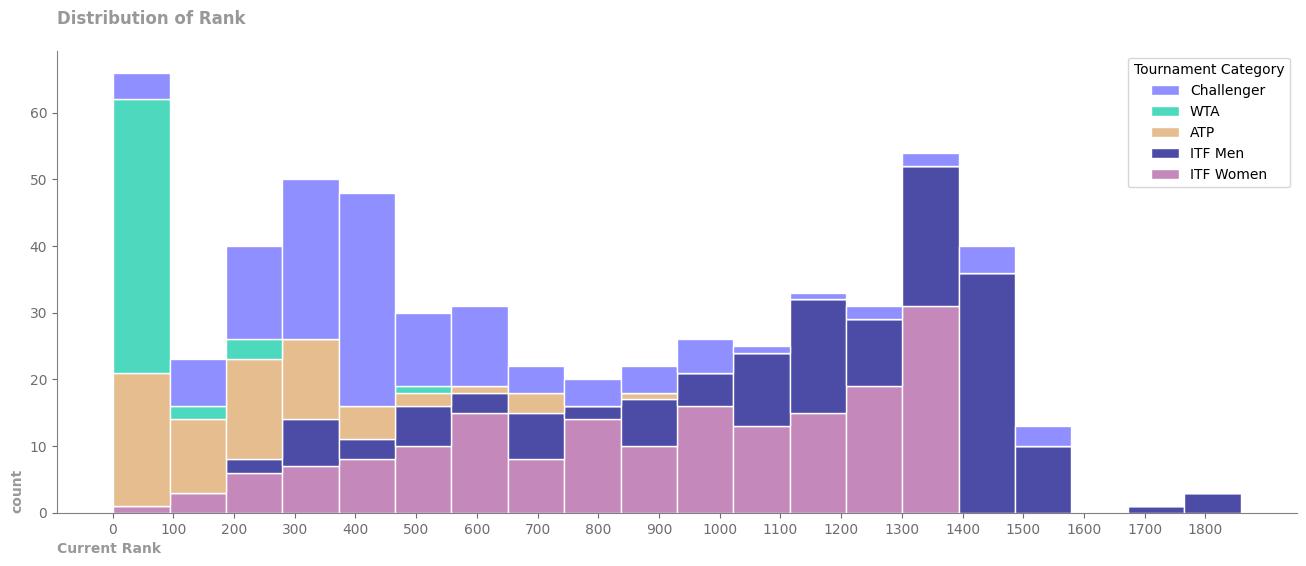

In [42]:
plt.figure(figsize = (16, 6))
colors = {'ATP': '#DCA260', 'Challenger': '#6060FF' , "ITF Men" : "#000080" ,'ITF Women': "#AB569F", 'WTA': "#00C9A2" }
sp=sns.histplot(x= "current_rank", data = tournament_players, hue = "tournament_category_name", palette= colors, bins=20,  multiple = "stack" , alpha= .7 , edgecolor='white')
sp.set_xticks(range(0,1900, 100))            # show every 5th tick
sns.despine()
sp.spines[['bottom' , 'left']].set_color('gray')
sp.tick_params(axis="x" , colors="#6D6D6D", labelsize=10 )
sp.tick_params(axis="y" , colors="#6D6D6D", labelsize=10 )
plt.title("Distribution of Rank" ,loc="left", color="#6D6D6D" , weight="bold" , alpha=.7 ,y=1.04)
sp.set_ylabel("count", loc="bottom" , color="#6D6D6D" , weight="bold" , alpha=.7)
sp.set_xlabel("Current Rank" ,loc="left",  color="#6D6D6D" ,weight="bold" , alpha=.7)

legend = sp.get_legend()
handles = legend.legendHandles
legend.remove()
sp.legend(handles,['Challenger', 'WTA', 'ATP' , "ITF Men" ,'ITF Women'], title='Tournament Category')
plt.show()